# Table of Content

1. Import libraries and data
2. Descriptive analysis
3. Data cleaning: consistency, duplicates, missing values
4. Data Ethics
5. Merge dataframes
6. Export dataframes

# 1. Import libraries and data

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import ipywidgets as widgets
from IPython.display import display, clear_output

import os, sys
import re

In [3]:
# Import Original Data (Path)

path = r'/Users/ladyarmanoid/Documents/Data Analytics/CareerFoundry/Course/2- Data Immersion/Achievement 6/Book Recommendation Analysis/'

# Import data

books = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'Books.csv'))

users = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'Users.csv'))

ratings = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'Ratings.csv'))

# 2. Descriptive analysis

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [10]:
books.tail()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [11]:
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [12]:
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [13]:
books.info

<bound method DataFrame.info of               ISBN                                          bookTitle  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                  bookAuthor yearOfPublication  \
0         Mark P. O. Morford             

In [14]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

In [15]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [16]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [17]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [18]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [19]:
books.describe()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [20]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [21]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


# 3. Data cleaning: consistency, duplicates, missing values

### Books Dataset

In [22]:
# Dropping last three columns containing image URLs which will not be required for analysis

books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

#checking data types of columns

books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

**yearOfPublication**

In [23]:
books.yearOfPublication.describe()

count     271360
unique       202
top         2002
freq       13903
Name: yearOfPublication, dtype: int64

In [ ]:
As it can be seen from below that there are some incorrect entries in this field. It looks like Publisher names  'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file Also some of the entries are strings and same years have been entered as numbers in some places

In [24]:
# Investigating the rows having 'DK Publishing Inc' as yearOfPublication

books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [25]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections

# ISBN '0789466953'
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

# ISBN '078946697X'
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

# Rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

# Corrections done

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [26]:
# Investigating the rows having 'Gallimard' as yearOfPublication

books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [28]:
# Making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le Clézio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le Clézio,2003,Gallimard


In [29]:
# Change 'yearOfPublication' with all values as integers

books.yearOfPublication = pd.to_numeric(books.yearOfPublication, errors='coerce')

print(sorted(books['yearOfPublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


However, the value 0 is invalid and as this dataset was published in 2004, we have assumed the the years after 2006 to be 

In [30]:
# Invalid keeping some margin in case dataset was updated thereafer

# Setting invalid years as NaN

books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

# Replacing NaNs with mean value of yearOfPublication

books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace = True)

In [31]:
# Rechecking the output

books.yearOfPublication.isnull().sum()

#No NaNs

0

In [32]:
# Resetting the dtype as int32

books.yearOfPublication = books.yearOfPublication.astype(np.int32)

**publisher**

In [33]:
# Exploring 'publisher' column

books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


Two NaNs

In [34]:
# Investigating rows having NaNs

# Checking with rows having bookTitle as Tyrant Moon to see if we can get any clues

books.loc[(books.bookTitle == 'Tyrant Moon'),:]

# no clues

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [35]:
# Checking with rows having bookTitle as Finder Keepers to see if we can get any clues

books.loc[(books.bookTitle == 'Finders Keepers'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134309,0156309505,Finders Keepers,Will,1989,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [36]:
# Checking by bookAuthor to find patterns

books.loc[(books.bookAuthor == 'Elaine Corvidae'),:]

# all having different publisher...no clues here

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory


In [37]:
# Checking by bookAuthor to find patterns

books.loc[(books.bookAuthor == 'Linnea Sinclair'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [38]:
# Since there is nothing in common to infer publisher for NaNs, replacing these with 'other'

books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

### Users Dataset

In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


**Age**

In [40]:
users.Age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

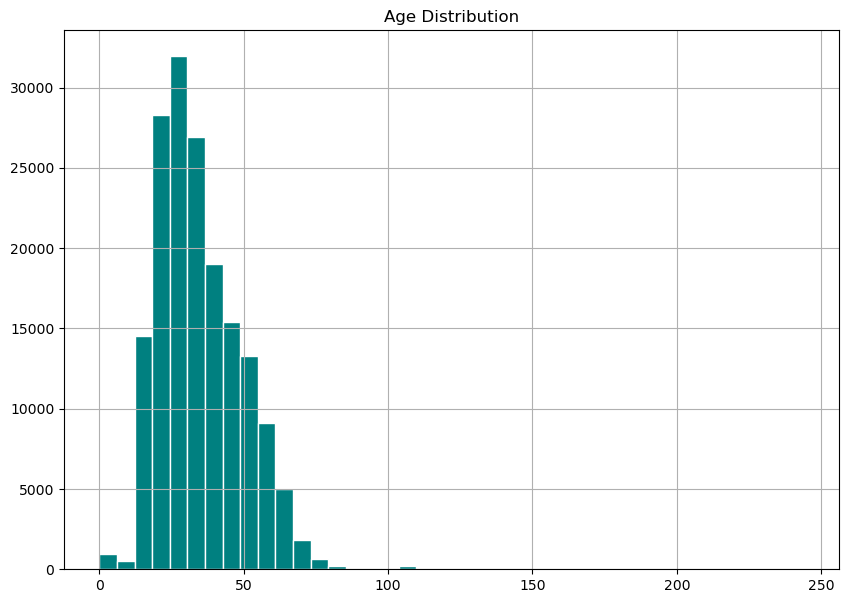

In [44]:
# Age column has some invalid entries like nan, 0 and very high values like 100 and above

plt.figure(figsize = (10, 7))
users.Age.hist(bins = 40, color = 'teal',edgecolor = 'white')
plt.title('Age Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'users_age.png'))
plt.show()

In [45]:
# Values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by NaNs

users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

# Replacing NaNs with mean

users.Age = users.Age.fillna(users.Age.mean())

# Setting the data type as int

users.Age = users.Age.astype(np.int32)

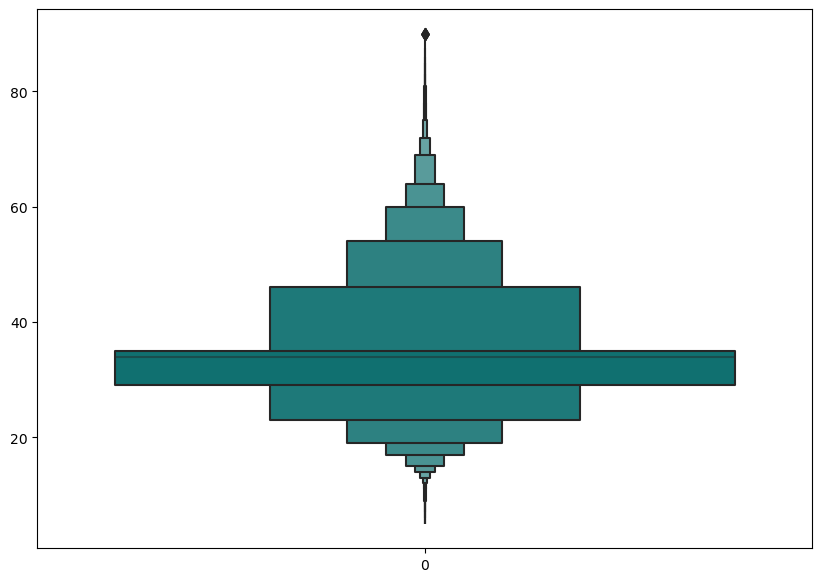

In [46]:
# Create a Boxen plot

plt.figure(figsize=(10, 7))
sns.boxenplot(users.Age, color = 'teal')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'users_age_boxenplot.png'))

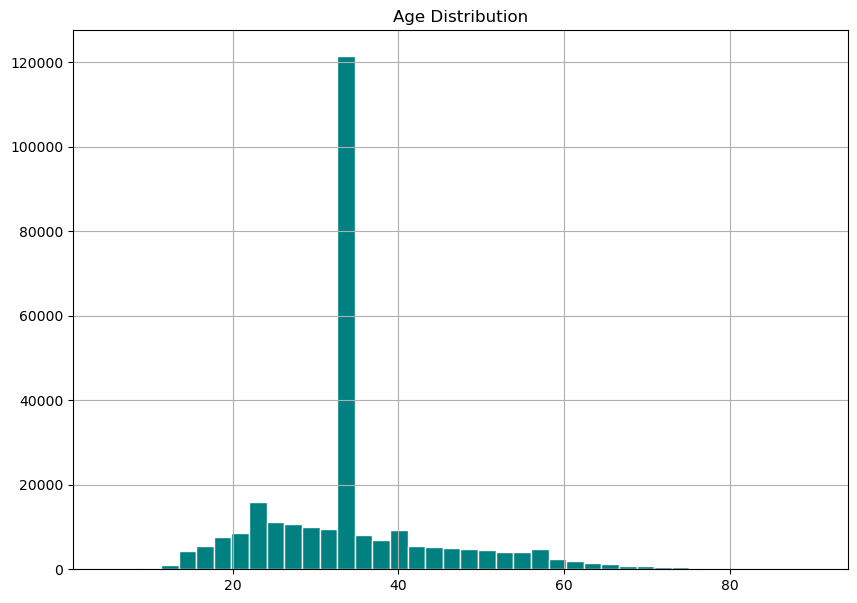

In [47]:
# Recreate histogram with updated values

plt.figure(figsize = (10, 7))
users.Age.hist(bins = 40, color = 'teal',edgecolor = 'white')
plt.title('Age Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'users_age.png'))
plt.show()

**Location**

In [54]:
# Split Location into City and Country

users['City'] = users['Location'].str.split(',').apply(lambda x: x[0])
users['Country'] = users['Location'].str.split(',').apply(lambda x: x[-1])

In [56]:
# Check output

users

,User-ID,Location,Age,City,State/Region,Country
0,1,"nyc, new york, usa",34,nyc,nyc,usa
1,2,"stockton, california, usa",18,stockton,stockton,usa
2,3,"moscow, yukon territory, russia",34,moscow,moscow,russia
3,4,"porto, v.n.gaia, portugal",17,porto,porto,portugal
4,5,"farnborough, hants, united kingdom",34,farnborough,farnborough,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",34,portland,portland,usa
278854,278855,"tacoma, washington, united kingdom",50,tacoma,tacoma,united kingdom
278855,278856,"brampton, ontario, canada",34,brampton,brampton,canada
278856,278857,"knoxville, tennessee, usa",34,knoxville,knoxville,usa


In [57]:
# Dropping 'State/Region' column

users.drop(['State/Region'], axis = 1, inplace = True)

In [58]:
# Check output

users

,User-ID,Location,Age,City,Country
0,1,"nyc, new york, usa",34,nyc,usa
1,2,"stockton, california, usa",18,stockton,usa
2,3,"moscow, yukon territory, russia",34,moscow,russia
3,4,"porto, v.n.gaia, portugal",17,porto,portugal
4,5,"farnborough, hants, united kingdom",34,farnborough,united kingdom
...,...,...,...,...,...
278853,278854,"portland, oregon, usa",34,portland,usa
278854,278855,"tacoma, washington, united kingdom",50,tacoma,united kingdom
278855,278856,"brampton, ontario, canada",34,brampton,canada
278856,278857,"knoxville, tennessee, usa",34,knoxville,usa


#### A second method to have the State/Region included, just as information

regex = r'(?P<City>[^,]+)\s*,\s*(?P<State>[^\s]+)\s+(?P<Country>[^,]+)'
users=b['Location'].str.extract(regex)
users # This splits the data into City, State and Country, so it works well for US address 


### Ratings Dataset

In [59]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [60]:
ratings.info

<bound method DataFrame.info of          User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]>

In [61]:
ratings.shape

(1149780, 3)

In [62]:
# Ratings dataset will have n_users*n_books entries if every user rated every item, this shows that the dataset is very sparse

n_users = users.shape[0]
n_books = books.shape[0]
n_users * n_books

75670906880

In [63]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [64]:
# Ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset

ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

ratings.shape,ratings_new.shape

# It can be seen that many rows having book ISBN not part of books dataset got dropped off

((1149780, 3), (1031136, 3))

In [65]:
# Ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset

ratings = ratings[ratings['User-ID'].isin(users['User-ID'])]

print(ratings.shape)
print(ratings_new.shape)

# No new users added, hence we will go with above dataset ratings_new (1031136, 3)

(n_users), (n_books)

(1149780, 3)
(1031136, 3)


(278858, 271360)

As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0

In [66]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [67]:
# Hence segregating implicit and explict ratings datasets

ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

(1031136, 3)
(383842, 3)
(647294, 3)


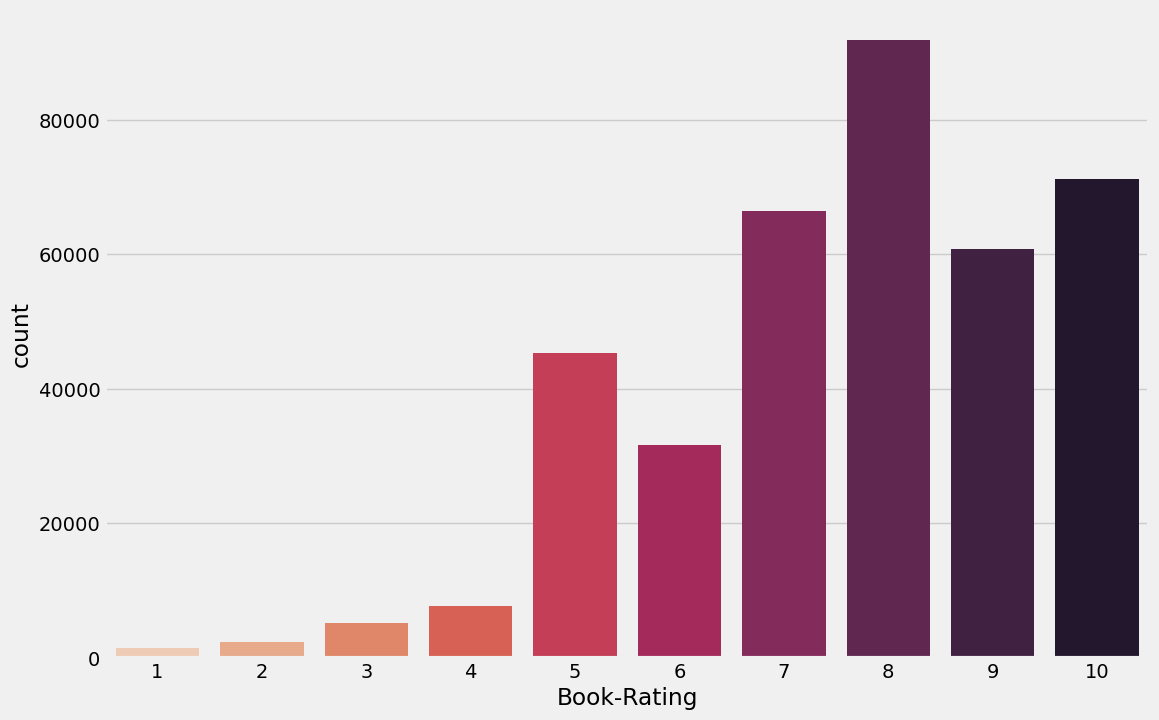

In [72]:
# Create a plot chart

print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
sns.countplot(data = ratings_explicit , x = 'Book-Rating', palette = 'rocket_r')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'book_ratings.png'))

It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

In [78]:
books.value_counts(dropna = False)

ISBN        bookTitle                                                           bookAuthor                     yearOfPublication  publisher           
0000913154  The Way Things Work: An Illustrated Encyclopedia of Technology      C. van Amerongen (translator)  1967               Simon &amp; Schuster    1
0812515560  People of the Lightning (The First North Americans series, Book 7)  Kathleen O'Neal Gear           1996               Tor Books               1
0812514440  Counterstrike                                                       Sean Flannery                  1991               Tor Books (Mm)          1
0812514459  Thomas the Rhymer: A Romance                                        Ellen Kushner                  1991               Tor Books (Mm)          1
0812514475  Timediver's Dawn                                                    L. E. Modesitt Jr.             1992               Tor Books (Mm)          1
                                                                     

In [79]:
users.value_counts(dropna = False)

User-ID  Location                             Age  City        Country        
1        nyc, new york, usa                   34   nyc          usa               1
185904   honolulu, hawai`i, usa               34   honolulu     usa               1
185910   encinitas, california, usa           34   encinitas    usa               1
185909   carlsbad, california, usa            34   carlsbad     usa               1
185908   carlsbad, california, usa            34   carlsbad     usa               1
                                                                                 ..
92959    santa rosa, california, usa          64   santa rosa   usa               1
92960    alicante, alicante, spain            19   alicante     spain             1
92961    den haag, zuid holland, netherlands  34   den haag     netherlands       1
92962    london, middlesex, united kingdom    34   london       united kingdom    1
278858   dublin, n/a, ireland                 34   dublin       ireland          

In [82]:
ratings.value_counts(dropna = False)

User-ID  ISBN        Book-Rating
2        0195153448  0              1
187762   0786927089  10             1
         0870448129  10             1
         0836218620  10             1
         0836218515  10             1
                                   ..
94923    0671643983  0              1
         0671658131  0              1
         0671658166  0              1
         0671661302  0              1
278854   0553579606  8              1
Name: count, Length: 1149780, dtype: int64

#### No missing values

In [83]:
books_dups = books[books.duplicated()]

In [84]:
books_dups

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [85]:
users_dups = users[users.duplicated()]

In [86]:
users_dups

,User-ID,Location,Age,City,Country


In [87]:
ratings_dups = ratings[ratings.duplicated()]

In [88]:
ratings_dups

,User-ID,ISBN,Book-Rating


#### No duplicated values

In [89]:
for col in books.columns.tolist():
  weird = (books[[col]].map(type) != books[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (books[weird]) > 0:
    print (col)

bookAuthor


In [92]:
books['bookAuthor']

0           Mark P. O. Morford
1         Richard Bruce Wright
2                 Carlo D'Este
3             Gina Bari Kolata
4              E. J. W. Barber
                  ...         
271355          Paula Danziger
271356              Teri Sloat
271357        Christine Wicker
271358                   Plato
271359     Christopher  Biffle
Name: bookAuthor, Length: 271360, dtype: object

In [93]:
books['bookAuthor'].head()

0      Mark P. O. Morford
1    Richard Bruce Wright
2            Carlo D'Este
3        Gina Bari Kolata
4         E. J. W. Barber
Name: bookAuthor, dtype: object

In [94]:
books['bookAuthor'].tail()

271355         Paula Danziger
271356             Teri Sloat
271357       Christine Wicker
271358                  Plato
271359    Christopher  Biffle
Name: bookAuthor, dtype: object

In [95]:
# Fixing the mixed type 'bookAuthor' in the books data frame to become a string

books['bookAuthor'] = books['bookAuthor'].astype('str')

In [96]:
# Rechecking the output

for col in books.columns.tolist():
  weird = (books[[col]].map(type) != books[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (books[weird]) > 0:
    print (col)

In [90]:
for col in users.columns.tolist():
  weird = (users[[col]].map(type) != users[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (users[weird]) > 0:
    print (col)

In [91]:
for col in ratings.columns.tolist():
  weird = (ratings[[col]].map(type) != ratings[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (ratings[weird]) > 0:
    print (col)

#### No mixed values

### **Top Popularity Based Recommendation**

#### At this point , a simple popularity based recommendation system can be built based on count of user ratings for different books

In [73]:
# Merge the top 10 books and ratings dataset with 'ISBN'

ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())
top10 = ratings_count.sort_values('Book-Rating', ascending = False).head(10)

top10.merge(books, left_index = True, right_on = 'ISBN')

,Book-Rating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


In [74]:
# Similarly segregating users who have given explicit ratings from 1-10 and those whose implicit behavior was tracked

users_exp_ratings = users[users['User-ID'].isin(ratings_explicit['User-ID'])]
users_imp_ratings = users[users['User-ID'].isin(ratings_implicit['User-ID'])]

In [75]:
# Checking shapes

print(users.shape)
print(users_exp_ratings.shape)
print(users_imp_ratings.shape)

(278858, 5)
(68091, 5)
(52451, 5)


In [76]:
top10

,Book-Rating
ISBN,
0316666343,5787
0385504209,4108
0312195516,3134
059035342X,2798
0142001740,2595
0971880107,2551
0060928336,2524
0446672211,2402
0452282152,2219


# 4. Data Ethics

##### The data contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books. This open-source data has no issue

# 5. Merge dataframes

### Merge 'Books' and 'Ratings' datasets with 'ISBN'

In [97]:
books_ratings = books.merge(ratings, on = 'ISBN', indicator = True)

In [98]:
books_ratings

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,_merge
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,both
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,both
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0,both
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,both
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0,both
...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463,7,both
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,276579,4,both
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,276680,0,both
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,276680,0,both


In [99]:
books_ratings['_merge'].value_counts()

_merge
both          1031136
left_only           0
right_only          0
Name: count, dtype: int64

In [100]:
# Merge the data frame performing a full outer join on the 'ISBN'

books_ratings = books.merge(ratings, on = 'ISBN', how = 'outer')

In [101]:
# Not assign any options regarding the maximum number of rows to display

pd.options.display.max_rows = None

In [102]:
books_ratings.head(100)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,41385.0,0.0
5,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544.0,8.0
6,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,85526.0,0.0
7,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,96054.0,0.0
8,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866.0,9.0
9,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629.0,9.0


### Merge 'Books_Ratings' and 'Users' datasets with 'User-ID'

In [103]:
books_ratings_users = books_ratings.merge(users, on = 'User-ID', indicator = True)

In [105]:
books_ratings_users.head(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,_merge
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2.0,0.0,"stockton, california, usa",18,stockton,usa,both
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,both
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8.0,0.0,"timmins, ontario, canada",34,timmins,canada,both
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8.0,0.0,"timmins, ontario, canada",34,timmins,canada,both
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8.0,0.0,"timmins, ontario, canada",34,timmins,canada,both


# 6. Export dataframes

In [107]:
# Export Merged Dataframe in Pickle Format

books_ratings_users.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'books_ratings_users.pkl'))

In [108]:
books_ratings_users.describe()

,yearOfPublication,User-ID,Book-Rating,Age
count,1.031136e+06,1.149780e+06,1.149780e+06,1.149780e+06
mean,1.995283e+03,1.403864e+05,2.866950e+00,3.608129e+01
std,7.309099e+00,8.056228e+04,3.854184e+00,1.032642e+01
min,1.376000e+03,2.000000e+00,0.000000e+00,5.000000e+00
25%,1.992000e+03,7.034500e+04,0.000000e+00,3.100000e+01
50%,1.997000e+03,1.410100e+05,0.000000e+00,3.400000e+01
75%,2.001000e+03,2.110280e+05,7.000000e+00,4.100000e+01
max,2.006000e+03,2.788540e+05,1.000000e+01,9.000000e+01
